# Machine Learning III: Introducción a Métodos de Clasificación Supervisada

CONCEPTOS

## PARTE 1: Un enfoque práctico para Machine Learning

1. Acerca del software.

2. ¿Qué es Machine Learning?

3. Modelando el problema de Machine Learning

4. El problema de clasificación supervisada. Un ejemplo programático básico guiado

    4.1 Representación del problema en sklearn
    
    4.2 Aprendiendo y prediciendo
    
    4.3 Más sobre el 'feature space'
    
    4.4 Entrenamiento y prueba
    
    4.5 Selección de modelos (I)

## PARTE 2: Conceptos de aprendizaje y teoría

1. ¿Qué es aprender?

    * Aprendizaje PAC
      
2. Dentro del modelo de aprendizaje

    * El algoritmo de aprendizaje Machine Learning humano
    * Clase de modelo y espacio de hipótesis
    * Función objetivo
    * Algoritmo de búsqueda/optimización/aprendizaje
    
3. Curvas de aprendizaje y sobreajuste (Overfitting)

    * Curvas de aprendizaje
    * Sobreajuste
        
4. Curas para el sobreajuste

    * Selección de modelos (II)
    * Regularización
    * Conjunto
    
5. ¿Qué hacer cuando...?

## PARTE 3: Primeros modelos

1. Modelos generativos y discriminativos
    * Modelos bayesianos (Naive Bayes) y algunas aplicaciones.

2. Máquinas de Vectores de Soporte (Support Vector Machines).
    * Modelando Máquinas de Vectores de Soporte.

# PART 3: Primeros modelos

# 1. Modelos generativos y discriminativos.

En el campo del aprendizaje automático, a menudo encontramos dos enfoques fundamentales para entender y modelar datos: **Modelos Generativos** y **Modelos Discriminativos**. Estos modelos ofrecen perspectivas distintas sobre cómo abordar problemas en el aprendizaje automático, cada uno con sus propias ventajas y aplicaciones. Esta sección tiene como objetivo aclarar estos conceptos, proporcionando una comprensión más clara para los estudiantes, particularmente aquellos para quienes el inglés no es su primer idioma.

- **Modelos Generativos** están diseñados para capturar cómo se generan los datos, permitiéndonos simular y entender la distribución subyacente de los datos. El objetivo principal de los modelos generativos es estimar la distribución de probabilidad conjunta $P(x, y)$, donde $x$ representa las características de entrada y $y$ representa las etiquetas de salida. Al dominar esta distribución, los modelos generativos nos permiten realizar tareas como la clasificación calculando la probabilidad posterior $P(y | x)$, que indica la probabilidad de una etiqueta dada la entrada de datos. Este cálculo se facilita mediante la Regla de Bayes, que vincula la probabilidad posterior con la probabilidad de verosimilitud $P(x | y)$ y la probabilidad previa $P(y)$. Una aplicación clásica de los modelos generativos es en escenarios donde no solo se requiere clasificación, sino también la generación de nuevos puntos de datos similares. Por ejemplo, los clasificadores Naive Bayes, los Modelos Ocultos de Markov y los Modelos de Mezcla Gaussiana son todos modelos generativos que pueden predecir etiquetas y generar datos que imitan el conjunto de datos original.

- **Modelos Discriminativos**, por otro lado, se centran directamente en aprender el límite de decisión o función que distingue entre diferentes clases en el conjunto de datos. A diferencia de los modelos generativos, los modelos discriminativos no se preocupan por modelar la distribución de los datos. Su objetivo es predecir la etiqueta de salida $y$ para una entrada dada $x$ de la manera más precisa posible, aproximando la probabilidad condicional $P(y | x)$. Esto hace que los modelos discriminativos sean particularmente adecuados para tareas donde el objetivo principal es la predicción, como la clasificación y la regresión. Ejemplos de modelos discriminativos incluyen la Regresión Logística, las Máquinas de Vectores de Soporte (SVM) y las Redes Neuronales. Estos modelos son celebrados por su capacidad para producir predicciones precisas, especialmente en escenarios complejos donde entender el proceso de generación de los datos es menos crítico.

- Un subconjunto importante de ambos modelos generativos y discriminativos son **Modelos Lineales**. Estos modelos asumen que los límites de decisión pueden expresarse como funciones lineales (o a veces cuadráticas) de las características de entrada. Un modelo lineal puede ser descrito por la ecuación $h(x) = a^T x + b$, donde $a$ representa un vector de pesos, $x$ es el vector de características de entrada, y $b$ es un término de sesgo. A pesar de su simplicidad, los modelos lineales forman la piedra angular de muchos algoritmos de aprendizaje automático porque son fáciles de interpretar y pueden ser la base para modelos más complejos. A través de la exploración de ejemplos lineales simples de ambos modelos generativos y discriminativos, los estudiantes pueden obtener una visión de cómo estos modelos se aplican a problemas de clasificación del mundo real, ofreciendo una comprensión fundamental de los límites de decisión lineales.

Esta visión general completa tiene como objetivo aclarar las distinciones y aplicaciones de modelos generativos y discriminativos en el aprendizaje automático, con un enfoque especial en hacer accesibles los conceptos para los estudiantes para quienes el inglés es un segundo idioma. Al proporcionar ejemplos y explicar los principios fundamentales detrás de estos modelos, el objetivo es fomentar una comprensión más profunda de los enfoques y su significado en el campo del aprendizaje automático.

[VIDEO: Explicación corta](https://www.youtube.com/watch?v=XtYMRq7f7KA&ab_channel=VictorLavrenko)


## 1.1. Modelos bayesianos (Naive Bayes) y algunas aplicaciones

Imagina que tenemos una gran cesta de frutas y queremos clasificarlas en tipos como manzanas, plátanos y naranjas. Esta tarea es similar a lo que hace el clasificador Naive Bayes en el mundo del aprendizaje automático, pero en lugar de clasificar frutas, clasifica información.

#### ¿Qué es Naive Bayes?

Naive Bayes es como una máquina de clasificación inteligente que nos ayuda a organizar cosas basándose en lo que sabe sobre ellas. Para nuestro ejemplo de frutas, piensa en Naive Bayes como un amigo que te ayuda a clasificar frutas diciéndote cuál es probable que sea una manzana, un plátano o una naranja, basándose en sus características como color, forma y sabor.

- **Teorema de Bayes**: Esta es la regla que usa nuestra máquina de clasificación. Es una fórmula matemática que ayuda a predecir el tipo de fruta basándose en sus características. Por ejemplo, si le dices que una fruta es larga y amarilla, el Teorema de Bayes ayuda a adivinar que probablemente sea un plátano.

- **Suposición Ingenua**: La parte "ingenua" proviene de que la máquina trata cada característica (como el color o la forma) como si fuera completamente independiente de las demás. Aunque esto no es cómo funcionan las cosas en la vida real (por ejemplo, las naranjas son tanto naranjas como redondas), esta suposición hace que nuestra máquina sea muy rápida y sorprendentemente buena para adivinar.

#### ¿Cómo clasifica Naive Bayes las frutas?

Desglosémoslo en pasos simples:

1. **Aprendizaje**: Primero, le muestras a la máquina muchas frutas diferentes y le dices qué son. Esto es como enseñarle el juego mostrándole ejemplos.

2. **Adivinanza**: Después de aprender, cuando le das a la máquina una nueva fruta que no ha visto antes, utiliza lo que aprendió para adivinar el tipo de fruta. Mira las características de la fruta (color, forma, sabor) y calcula a qué tipo es más probable que pertenezca.

##### Viendo Naive Bayes en acción

Imagina que dibujas círculos alrededor de manzanas, plátanos y naranjas basándote en sus características. Naive Bayes hace algo similar en su mente. Cuando llega una nueva fruta, ve dónde encaja mejor basándose en los círculos dibujados a partir de lo que aprendió.

#### ¿Por qué es tan especial Naive Bayes?

A pesar de que hace suposiciones simples, Naive Bayes puede clasificar rápidamente mucha información (o frutas) y hacer conjeturas precisas. Es como tener un clasificador de frutas super rápido que mejora cuanto más aprende.

A continuación, veremos cómo podemos usar este increíble clasificador no solo para frutas, sino para clasificar todo tipo de cosas, haciendo nuestras vidas más fáciles y organizadas. Lo tomaremos paso a paso, asegurándonos de que sea divertido y fácil de entender.

[VIDEO: Naive Bayes explicado](https://www.youtube.com/watch?v=O2L2Uv9pdDA&ab_channel=StatQuestwithJoshStarmer)


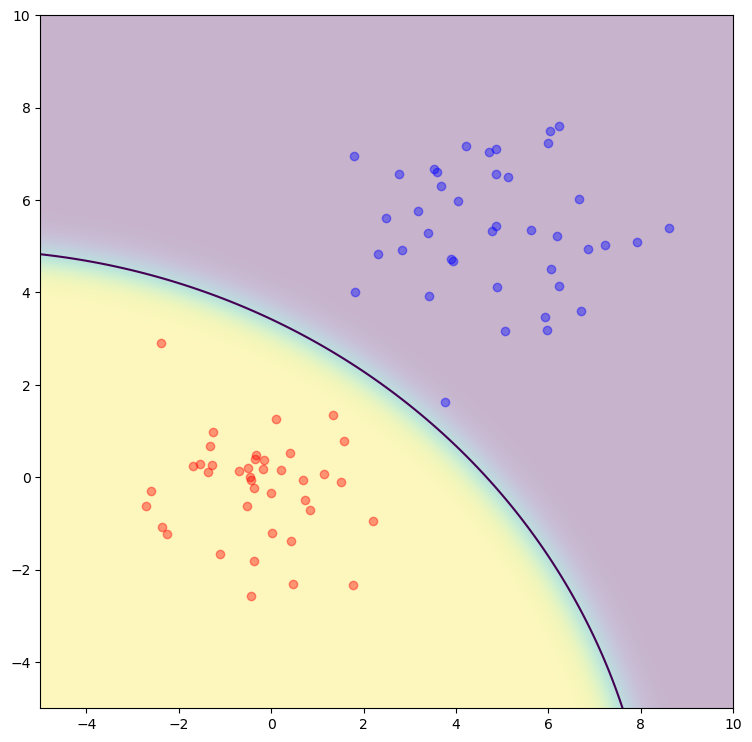

In [3]:
# Reset the environment to ensure a clean slate
%reset -f

# Enable plotting in the Jupyter Notebook
%matplotlib inline

# Import necessary libraries
import numpy as np
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# Create synthetic data for two groups
# The data for each group is generated around a different center point to simulate distinction
X = np.concatenate([1.25*np.random.randn(40,2), 5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)), -np.ones((40,1))])

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()
# Train the classifier with the synthetic data
nb.fit(X, y.ravel())

# Create a grid of points to visualize the decision boundary
delta = 0.025
xx = np.arange(-5.0, 10.0, delta)
yy = np.arange(-5.0, 10.0, delta)
XX, YY = np.meshgrid(xx, yy)

# Predict probabilities on the grid to visualize the decision boundary
Z = nb.predict_proba(np.c_[XX.ravel(), YY.ravel()])
Z = Z[:, 1].reshape(XX.shape)

# Plotting
plt.figure()
# Separate the data into two groups for plotting
idxplus = y == 1
idxminus = y == -1
idxplus = idxplus.flatten()
idxminus = idxminus.flatten()
# Plot the first group in red
plt.scatter(X[idxplus, 0], X[idxplus, 1], color='r', alpha=0.4)
# Plot the second group in blue
plt.scatter(X[idxminus, 0], X[idxminus, 1], color='b', alpha=0.4)
# Overlay the probability density to visualize the decision boundary
plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5, 10, -5, 10), alpha=0.3, vmin=0, vmax=1)
# Draw the contour line where the probability is 0.5 (decision boundary)
plt.contour(XX, YY, Z, [0.5])
# Adjust the figure size for better visibility
fig = plt.gcf()
fig.set_size_inches(9, 9)

>Si el límite no es lineal, ¿por qué se considera un modelo lineal? No es un modelo lineal, aunque es un modelo afín con respecto a los pesos. En el caso particular de la clasificación de texto, utilizaremos ciertas funciones de densidad de probabilidad que harán que el modelo sea lineal.

El clasificador Gaussian Naive Bayes, un pilar del aprendizaje automático, destaca particularmente por su simplicidad y efectividad en tareas de clasificación. A través del ejemplo en Python proporcionado, hemos visualizado no solo el proceso de clasificación, sino también cómo Naive Bayes toma decisiones basadas en probabilidades.

**Aspectos clave**

**Simplicidad en acción:** El clasificador Naive Bayes, a pesar de su suposición subyacente de independencia de características, demuestra un rendimiento robusto al clasificar datos en grupos distintos. Este ejemplo, utilizando datos sintéticos, muestra cómo incluso con suposiciones básicas, se pueden obtener percepciones significativas.

**Visualización de límites de decisión:** Al graficar los puntos de datos y el límite de decisión, obtenemos una comprensión visual de cómo Naive Bayes clasifica los datos. La línea de contorno en la que la probabilidad es 0.5 actúa como umbral: los puntos de datos que caen a un lado de esta línea pertenecen a una categoría, y los que están al otro lado pertenecen a otra.

**Enfoque probabilístico:** El gradiente de fondo en la visualización representa la probabilidad de pertenecer a una de las categorías. Este gradiente ilustra la naturaleza probabilística de Naive Bayes, ofreciendo más que solo clasificaciones; proporciona percepciones sobre la certeza de sus predicciones.

## 1.2. Representación básica de documentos

Imagina que estás ordenando una pila de diferentes historias y quieres organizarlas en grupos como "cuentos de aventuras" o "cuentos de hadas". Esto es lo que llamamos **clasificación de texto**, y utilizamos un método llamado Naive Bayes para ayudarnos a averiguar a qué grupo pertenece cada historia.

### ¿Cómo entendemos las historias?

Para ayudar a Naive Bayes a clasificar historias, primero necesitamos traducir las historias a un formato que pueda entender. Hacemos esto utilizando un enfoque de **bolsa de palabras**. Piensa en esto como tomar cada historia y descomponerla en una lista de palabras que nos interesan.

- **Ejemplo de Bolsa de Palabras**: Supongamos que estamos interesados en historias sobre "piratas" y "magos". Decidimos enfocarnos en ciertas palabras como "barco", "tesoro", "varita" y "hechizo". Luego vemos cuántas veces aparecen estas palabras en cada historia.

| Historia | Barco | Tesoro | Varita | Hechizo |
|----------|-------|--------|--------|---------|
| 1 (Piratas) | 3     | 2      | 0      | 0       |
| 2 (Piratas) | 2     | 1      | 0      | 1       |
| 3 (Magos)   | 0     | 0      | 2      | 3       |
| 4 (Magos)   | 0     | 1      | 3      | 2       |

- En esta tabla, la Historia 1 tiene 3 palabras "barco", 2 palabras "tesoro" y ninguna de las palabras "varita" o "hechizo", lo que ayuda a Naive Bayes a adivinar que es una historia de piratas.

### Cómo Naive Bayes hace su conjetura

Naive Bayes observa el recuento de palabras para cada historia. Si una historia tiene más palabras de "pirata" como "barco" y "tesoro", adivina que es sobre piratas. Si tiene más palabras de "mago" como "varita" y "hechizo", adivina que es sobre magos.

### Puntos clave para recordar

- **Conteo vs. Presencia**: A veces, solo saber si una palabra aparece en la historia o no (sí/no) es suficiente, en lugar de contar cuántas veces aparece.
- **El orden de las palabras no importa**: Con la bolsa de palabras, el orden de las palabras se ignora. "El tesoro está en el barco" y "El barco está en el tesoro" se verían como lo mismo. Aunque significan cosas diferentes, para nuestro propósito de clasificar historias, este enfoque simple aún puede ser muy efectivo.

Al transformar historias en bolsas de palabras, Naive Bayes nos ayuda a categorizarlas en temas como "piratas" o "magos". A pesar de su simplicidad, este método es una herramienta poderosa para ayudar a las computadoras a entender y organizar historias, al igual que nosotros.


### Entendiendo el Clasificador Naive Bayes en la Clasificación de Documentos

Naive Bayes es un enfoque sencillo pero poderoso utilizado para predecir la categoría de documentos. Es como jugar un juego de adivinanzas donde, basado en las palabras utilizadas en un documento, intentamos predecir su tema, como si se tratara de "economía" o "tecnología".

### Cómo Funciona Naive Bayes

En esencia, Naive Bayes selecciona la categoría que es más probable que sea correcta basada en las palabras presentes en el documento. Esto se hace utilizando una fórmula matemática conocida como Teorema de Bayes:

- Para descubrir cuál categoría es la más probable, usamos esta fórmula:

  $$\hat{y} = \arg\max_y p(y|x).$$

  Aquí, $\hat{y}$ es nuestra mejor conjetura para la categoría del documento, $y$ representa una categoría posible, y $x$ es la descripción del documento (como las palabras que contiene).

- El Teorema de Bayes nos ayuda en este juego de adivinanzas al relacionar diferentes probabilidades:

  $$p(y|x) = \frac{p(x|y)p(y)}{p(x)}.$$

  En términos simples, esto nos dice cuán probable es una categoría dada la descripción del documento. Calculamos esto mirando cuán comunes son las palabras en cada categoría ($p(x|y)$), cuán común es cada categoría ($p(y)$) y cuán comunes son estas palabras en todos los documentos ($p(x)$).

### Simplificando el Proceso

Cuando estamos clasificando documentos, esencialmente estamos comparando qué categoría es más probable basada en las palabras utilizadas. Por ejemplo, si un documento contiene palabras más comunes en "economía" que en "tecnología", será clasificado bajo "economía".

- Curiosamente, no necesitamos preocuparnos por $p(x)$, la probabilidad de ver un conjunto particular de palabras, porque no cambia nuestra decisión. Esto simplifica nuestra fórmula a:

  $$P(y|x) \propto P(y)P(x|y)$$

  Esto significa que estamos principalmente interesados en cuán probable es una categoría ($P(y)$) y cuán probable es ver estas palabras si el documento está en esa categoría ($P(x|y)$).

### La Suposición Especial de Naive Bayes

Lo que hace "naive" a Naive Bayes es su suposición de que cada palabra en el documento afecta la categoría independientemente de otras palabras. Esta suposición nos permite simplemente multiplicar las probabilidades de palabras individuales relacionadas con una categoría para encontrar la probabilidad total:

$$p(x_1,x_2,...,x_N | y) = p(x_1|y)p(x_2|y)...p(x_N|y) = \prod\limits_{i=1}^N p(x_i|y)$$

Por ejemplo, la probabilidad de que un documento trate sobre "tecnología" dado que contiene ciertas palabras se puede calcular multiplicando las probabilidades de cada una de esas palabras pertenecientes a la categoría "tecnología".

### Aplicación Práctica

Al aplicar Naive Bayes a la clasificación de documentos, es posible que no siempre conozcamos la probabilidad previa de cada categoría ($p(y)$). En tales casos, podríamos tratar todas las categorías como igualmente probables o usar lo que se conoce como un prior no informativo. Esto nos lleva a centrarnos en la probabilidad de palabras dentro de las categorías, simplificando nuestra tarea a encontrar la categoría más probable basada en las palabras del documento.

En resumen, Naive Bayes nos ayuda a clasificar documentos comparando las probabilidades de palabras dentro de las categorías, haciéndolo una herramienta sencilla pero efectiva para entender y organizar la información.

## 1.3. Estimación de las probabilidades condicionadas 

El último paso que queda es la estimación de las probabilidades condicionadas individuales. Existen dos variantes clásicas el **Naive Bayes multinomial** y el **Naive Bayes Bernoulli**. La diferencia entre ambas radica en el objetivo de lo que modelan. **En el NB Multinomial calculamos la probabilidad de generar el documento observado.** En este sentido, multiplicamos la probabilidad condicional de cada palabra del documento por todas las palabras presentes en el documento. Una visión alternativa es el *modelo Bernoulli*. **Obsérvese que en el Bernouilli Naive Bayes la probabilidad final depende de las palabras que aparecen en el documento pero también de las palabras que no aparecen** mientras que en el multinomial NB sólo depende de las palabras que aparecen. Por el contrario, el Naive Bayes multinomial tiene en cuenta la multiplicidad de las palabras del documento, mientras que Bernoulli no. Consideremos en este ejemplo el *modelo Bernoulli* que es coherente con nuestra representación donde un cero indica que una palabra no está presente en el documento y un uno representa que está presente. Para estimar esta probabilidad podemos utilizar una aproximación frecuentista a la probabilidad, es decir, estimaremos la probabilidad como la frecuencia de aparición de cada término en cada categoría. Este cálculo divide el número de documentos en los que aparece la palabra entre el número total de documentos. 

En nuestro ejemplo anterior, $p(x_3=1 (\text{aparece la palabra 'precio'})|y =\text{'tech'}) = 1/2$ y $p(x_3=1 (\text{aparece la palabra 'precio'})|y =\text{'eco'}) = 2/2$. Se calcula dividiendo el número de documentos en los que aparece la palabra precio en una categoría determinada entre el número de documentos de esa categoría.

### 1.3.1. El efecto de probabilidad cero
En el ejemplo anterior, la probabilidad $p(x_5=1|y=texto{'eco'}) = 0$. Esto implica que si aparece la palabra "móvil" el documento no puede pertenecer a la clase $\text{'economía'}$. No es razonable penalizar completamente toda una clase por la aparición o no de una sola palabra. En su lugar, es habitual asignar a esos casos un valor de probabilidad muy bajo. Un método bien conocido para corregir este efecto es la llamada **corrección de Laplace**. Se calcula del siguiente modo

$$p(x_i=1 | y=c_k ) = \frac{\text{# de documentos de la clase } c_k \text{ donde aparece la palabra } x_i \text{ aparece} + 1}{\text{# de documentos de la clase } c_k + M}$$

donde $M$ es la cantidad de palabras de la descripción. 

### 1.3.2. Efecto de desbordamiento

A medida que aumenta el número de palabras de la descripción, aumenta la probabilidad de que muchas de esas palabras no estén presentes en el documento. El producto de muchos valores muy pequeños puede provocar efectos de desbordamiento en coma flotante. Por este motivo, es habitual utilizar la probabilidad logarítmica en su lugar. Esta transformación no modifica el límite de decisión. En nuestro caso simplificado

$$\log p(x|y) = \sum\limits_i=1}^N \log p(x_i|y)$$

## 1.4. Aplicación de Naive Bayes a la clasificación de textos

En este ejemplo, nuestro objetivo es clasificar automáticamente las noticias según su título en veintiocho temas estándar. En este problema trataremos todas las noticias de portada del New York Times desde 1996 hasta 2006, codificadas según las Agendas Políticas (http://www.policyagendas.org). Esta colección de datos ha sido recopilada por Amber E. Boydstun.

En concreto, nos interesa clasificar las noticias de The New York Times en los siguientes macrotemas según su título:



<table border="1">
<tr>
<td>
1 
<td>
Macroeconomics
<tr>
<td>
2 
<td>
Civil Rights, Minority Issues, and Civil Liberties 
<tr>
<td>
3
<td>
Health
<tr>
<td>
4 
<td>Agriculture
<tr>
<td>
5 
<td>Labor, Employment, and Immigration
<tr>
<td>
6 
<td> Education
<tr>
<td>
7
<td>Environment
<tr>
<td>
8
<td>Energy
<tr>
<td>
10 
<td>Transportation
<tr>
<td>
12 
<td>Law, Crime, and Family Issues
<tr>
<td>
13 
<td>Social Welfare
<tr>
<td>
14 
<td>Community Development and Housing Issues
<tr>
<td>
15 
<td>Banking, Finance, and Domestic Commerce
<tr>
<td>
16 
<td>Defense
<tr>
<td>
17 
<td>Space, Science, Technology and Communications
<tr>
<td>
18 
<td>Foreign Trade
<tr>
<td>
19 
<td>International Affairs and Foreign Aid
<tr>
<td>
20 
<td>Government Operations
<tr>
<td>
21 
<td>Public Lands and Water Management
<tr>
<td>
24 
<td>State and Local Government Administration
<tr>
<td>
26 
<td>Weather and Natural Disasters
<tr>
<td>
27 
<td>Fires
<tr>
<td>
28 
<td>Arts and Entertainment
<tr>
<td>
29 
<td>Sports and Recreation
<tr>
<td>
30 
<td>Death Notices
<tr>
<td>
31 
<td>Churches and Religion
<tr>
<td>
99 
<td>Other, Miscellaneous, and Human Interest


In [4]:
%reset -f
#load data
import pandas as pd
data=pd.read_csv('./files/Boydstun_NYT_FrontPage_Dataset_1996-2006_0.csv')
data.head()

,Article_ID,Date,Article_Sequence,Title,Summary,Topic_6digit,Topic_4digit,Topic_2digit,War on Terror,Katrina,Israel/Palestine,Immigration,Presidential Elections,Clinton Impeachment,Enron,Darfur,Race/Ethnicity,Schiavo
0,1,1/1/1996,a,Nation's Smaller Jails Struggle To Cope With S...,Jails overwhelmed with hardened criminals,120500,1205,12,0,0,0,0,0,0,0,0,0,0
1,2,1/1/1996,b,Dancing (and Kissing) In the New Year,new years activities,280000,2800,28,0,0,0,0,0,0,0,0,0,0
2,3,1/1/1996,c,Forbes's Silver Bullet for the Nation's Malaise,Steve Forbes running for President,201201,2012,20,0,0,0,0,1,0,0,0,0,0
3,4,1/1/1996,d,"Up at Last, Bridge to Bosnia Is Swaying Gatewa...",U.S. military constructs bridge to help their ...,160200,1602,16,0,0,0,0,0,0,0,0,0,0
4,5,1/1/1996,e,2 SIDES IN SENATE DISAGREE ON PLAN TO END FURL...,Democrats and Republicans can't agree on plan ...,201206,2012,20,0,0,0,0,0,0,0,0,0,0


Dividamos el conjunto de datos en dos conjuntos: 
    
+ Entrenaremos el clasificador con noticias hasta 2004.
+ Probaremos el clasificador con noticias de 2005 y 2006.

In [5]:
import numpy as np
import pandas as pd

# Splitting the dataset based on date: Training data will be from before 1/1/2004, and testing data from 2004 to 2006
split = pd.to_datetime(pd.Series(data['Date'])) < pd.datetime(2004, 1, 1)

# Extracting the 'Title' column as our raw data
raw_data = data['Title']

# Splitting the titles into training and testing sets based on the date
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]

# Extracting the topic labels for our dataset
y = data['Topic_2digit']

# Splitting the labels into training and testing sets corresponding to our title splits
y_train = y[split]
y_test = y[np.logical_not(split)]

# Printing out the sizes of our training and testing datasets to ensure the split was done correctly
print('Check the split sizes, train, test and total amount of data:')
print(raw_train.shape, raw_test.shape, raw_data.shape)

# Displaying the unique labels in our dataset to understand the classification categories
print('Display the labels:')
print(np.unique(y))

Check the split sizes, train, test and total amount of data:
(23584,) (7450,) (31034,)
Display the labels:
[ 1  2  3  4  5  6  7  8 10 12 13 14 15 16 17 18 19 20 21 24 26 27 28 29
 30 31 99]


C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_29772\264428885.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split = pd.to_datetime(pd.Series(data['Date'])) < pd.datetime(2004, 1, 1)


In [6]:
# Importing the necessary tool for text processing
from sklearn.feature_extraction.text import CountVectorizer

# Initializing the CountVectorizer with specific parameters
vectorizer = CountVectorizer(
    min_df=2,  # A word must appear in at least two documents to be considered
    stop_words='english',  # Removing common English words (e.g., 'and', 'the', 'of') that don't contribute much to the meaning
    strip_accents='unicode'  # Removing accents from characters for consistency
)

# Demonstrating the preprocessing and tokenization process with an example
test_string = raw_train[0]  # Taking the first title from the training set as an example
print("Example: " + test_string + "\n")
# Showing the result of preprocessing (e.g., lowercasing, removing punctuation)
print("Preprocessed: " + vectorizer.build_preprocessor()(test_string) + "\n")
# Displaying the list of words (tokens) after splitting the preprocessed text
print("Tokenized:" + str(vectorizer.build_tokenizer()(test_string)) + "\n")
# Applying the full analyzer (preprocessing, tokenizing, and filtering stop words)
print("Analyzed data string:" + str(vectorizer.build_analyzer()(test_string)) + "\n")

# Processing the entire datasets to convert the raw text into a matrix of token counts
X_train = vectorizer.fit_transform(raw_train)  # Learning the vocabulary and transforming the training set
X_test = vectorizer.transform(raw_test)  # Transforming the test set based on the learned vocabulary

# Printing the total number of tokens (unique words) found in the dataset
print("Number of tokens: " + str(len(vectorizer.get_feature_names())) + "\n")
# Displaying a slice of the tokens for inspection
print("Extract of tokens:")
print(vectorizer.get_feature_names()[1000:1100])

Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates 

Preprocessed: nation's smaller jails struggle to cope with surge in inmates 

Tokenized:['Nation', 'Smaller', 'Jails', 'Struggle', 'To', 'Cope', 'With', 'Surge', 'in', 'Inmates']

Analyzed data string:['nation', 'smaller', 'jails', 'struggle', 'cope', 'surge', 'inmates']

Number of tokens: 8950

Extract of tokens:
['boeing', 'boiling', 'boils', 'bold', 'bolster', 'bolsters', 'bolt', 'bolts', 'bomb', 'bombay', 'bombed', 'bomber', 'bombers', 'bombing', 'bombings', 'bombs', 'bonanza', 'bond', 'bondage', 'bonds', 'bone', 'bones', 'bonn', 'bono', 'bonus', 'bonuses', 'book', 'books', 'booksellers', 'bookstore', 'boom', 'boomers', 'booming', 'booms', 'boost', 'boot', 'bora', 'border', 'borders', 'born', 'borough', 'boroughs', 'borrow', 'borrowing', 'bosnia', 'bosnian', 'bosnians', 'boss', 'bosses', 'boston', 'botched', 'bottle', 'bought', 'bounce', 'bound', 'bounty', 'bout', 'bow', 'bowing', 'bowl', 'bows', 'box', 'boxes

C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


classification accuracy: 0.4348993288590604
Classification Report:
              precision    recall  f1-score   support

           1       0.32      0.64      0.43        56
           2       0.01      0.67      0.01         3
           3       0.51      0.65      0.57       343
           4       0.00      0.00      0.00         0
           5       0.01      1.00      0.01         1
           6       0.13      0.96      0.23        27
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          12       0.46      0.43      0.44       466
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.09      0.54      0.16        57
          16       0.54      0.57      0.55      1259
          17       0.03      1.00      0.06         4
          18       0.00      0.00      0.00         0
          19  

C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


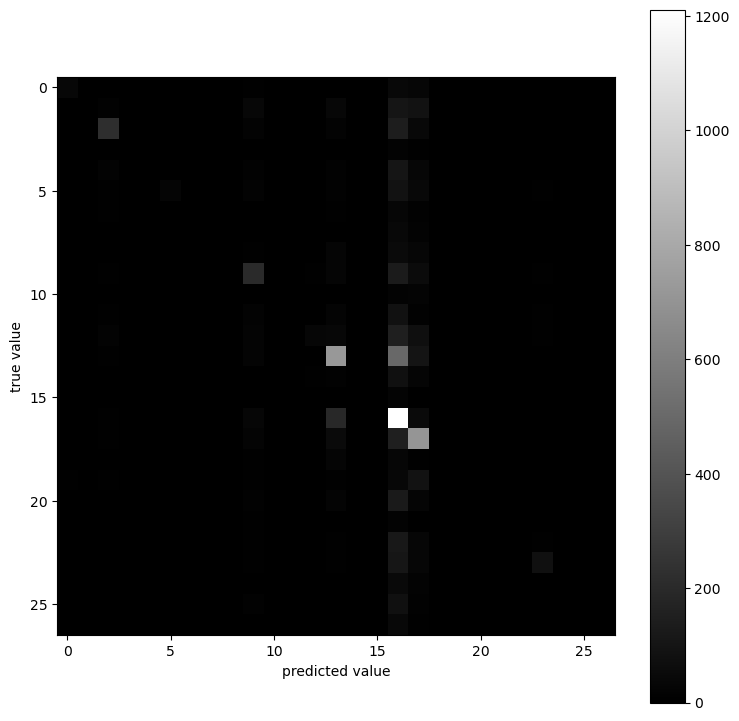

In [7]:
# Enable plotting directly within the notebook
%matplotlib inline

# Import the Bernoulli Naive Bayes classifier from scikit-learn
from sklearn.naive_bayes import BernoulliNB

# Initialize the classifier
nb = BernoulliNB()

# Train the classifier on the training data
nb.fit(X_train, y_train)

# Predict the labels of the test set
y_hat = nb.predict(X_test)

# Import necessary tools for evaluation
from sklearn import metrics
import matplotlib.pyplot as plt

# Define a function to plot the confusion matrix
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest', cmap='gray')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9, 9)

# Print the classification accuracy: the proportion of correctly predicted instances
print("classification accuracy:", metrics.accuracy_score(y_hat, y_test))

# Call the function to plot the confusion matrix for the test predictions
plot_confusion_matrix(y_hat, y_test)

# Print a detailed classification report showing precision, recall, f1-score, and support for each class
print("Classification Report:")
print(metrics.classification_report(y_hat, np.array(y_test)))

<div class = "alert alert-success">**PREGUNTA:** Identifica las tres clases más simples.
</div>

In [8]:
#Save data for future use.
import pickle
ofname = open('NYT_data.pkl', 'wb')
s = pickle.dump([X_train,y_train,X_test,y_test],ofname)
ofname.close()

In [9]:
#What are the top N most predictive features per class?
N = 5
voc = vectorizer.get_feature_names()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.coef_[i])[-N:]
    print ('Code: '+ str(label) + ' Terms : '+ str([voc[i] for i in topN]))

Code: 1 Terms : ['cut', 'bush', 'economy', 'budget', 'tax']
Code: 2 Terms : ['race', 'gay', 'new', 'court', 'abortion']
Code: 3 Terms : ['care', 'medicare', 'drug', 'health', 'new']
Code: 4 Terms : ['farm', 'safety', 'new', 'farmers', 'food']
Code: 5 Terms : ['workers', 'strike', 'union', 'immigrants', 'new']
Code: 6 Terms : ['students', 'city', 'new', 'school', 'schools']
Code: 7 Terms : ['rules', 'warming', 'air', 'new', 'pollution']
Code: 8 Terms : ['blackout', 'california', 'power', 'energy', 'oil']
Code: 10 Terms : ['new', 'security', '800', 'flight', 'crash']
Code: 12 Terms : ['drug', 'case', 'death', 'new', 'police']
Code: 13 Terms : ['plan', 'security', 'new', 'social', 'welfare']
Code: 14 Terms : ['city', 'homeless', 'york', 'rent', 'new']
Code: 15 Terms : ['new', 'billion', 'deal', 'enron', 'microsoft']
Code: 16 Terms : ['bush', 'challenged', 'war', 'iraq', 'nation']
Code: 17 Terms : ['space', 'nasa', 'loss', 'new', 'shuttle']
Code: 18 Terms : ['business', 'bush', 'clinton', 

C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


Comprobemos qué ocurriría si enriqueciéramos el conjunto de datos con el resumen del artículo.

In [11]:
raw_data = data['Title']+data['Summary']
raw_train = raw_data[split]
raw_test = raw_data[np.logical_not(split)]
y = data['Topic_2digit']
y_train = y[split]
y_test = y[np.logical_not(split)]

In [12]:
# Let us tokenize the data
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=2, 
 stop_words='english', 
 strip_accents='unicode')

#example
test_string = raw_train[0]
print ("Example: " + test_string +"\n")
print ("Preprocessed: " + vectorizer.build_preprocessor()(test_string)+"\n")
print ("Tokenized:" + str(vectorizer.build_tokenizer()(test_string))+"\n")
print ("Analyzed data string:" + str(vectorizer.build_analyzer()(test_string))+"\n")


#Fit and convert data
X_train = vectorizer.fit_transform(raw_train)
X_test = vectorizer.transform(raw_test)

print ("\n")
print ("Number of tokens: " + str(len(vectorizer.get_feature_names())) +"\n")
print ("Extract of tokes:")
print( vectorizer.get_feature_names()[1000:1100])

Example: Nation's Smaller Jails Struggle To Cope With Surge in Inmates Jails overwhelmed with hardened criminals

Preprocessed: nation's smaller jails struggle to cope with surge in inmates jails overwhelmed with hardened criminals

Tokenized:['Nation', 'Smaller', 'Jails', 'Struggle', 'To', 'Cope', 'With', 'Surge', 'in', 'Inmates', 'Jails', 'overwhelmed', 'with', 'hardened', 'criminals']

Analyzed data string:['nation', 'smaller', 'jails', 'struggle', 'cope', 'surge', 'inmates', 'jails', 'overwhelmed', 'hardened', 'criminals']



Number of tokens: 11354

Extract of tokes:
['banned', 'banner', 'banning', 'bans', 'bansenate', 'banus', 'baptist', 'baptists', 'bar', 'barak', 'barbie', 'bare', 'barely', 'bares', 'bargain', 'bargaining', 'bargains', 'barnes', 'barney', 'baron', 'barons', 'barrage', 'barred', 'barrel', 'barren', 'barrier', 'barriers', 'barring', 'bars', 'barter', 'base', 'baseball', 'based', 'basement', 'bases', 'basespentagon', 'bashing', 'basic', 'basis', 'baskeball', 'bask

classification accuracy: 0.5155704697986577
Classification Report:
              precision    recall  f1-score   support

           1       0.45      0.61      0.52        83
           2       0.06      0.94      0.11        18
           3       0.69      0.59      0.63       514
           4       0.00      0.00      0.00         0
           5       0.03      0.67      0.06         9
           6       0.46      0.87      0.61       106
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.01      0.50      0.02         2
          12       0.61      0.41      0.49       651
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.23      0.55      0.32       136
          16       0.70      0.64      0.67      1466
          17       0.06      1.00      0.11         8
          18       0.00      0.00      0.00         0
          19  

C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


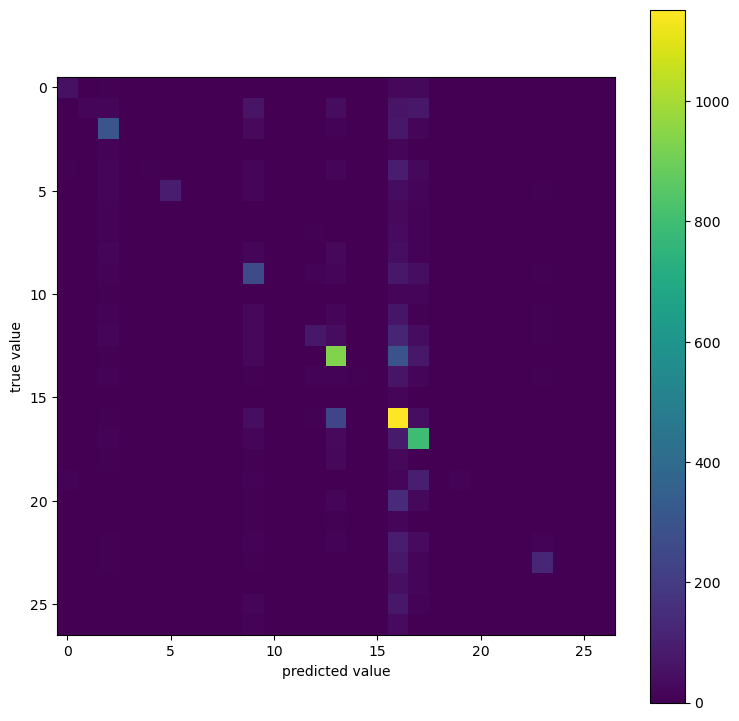

In [13]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_train,y_train)

y_hat = nb.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

In [14]:
#Save data for future use.
import pickle
ofname = open('NYT_context_data.pkl', 'wb')
s = pickle.dump([X_train,y_train,X_test,y_test],ofname)
ofname.close()

In [15]:
#What are the top N most predictive features per class?
N = 5
voc = vectorizer.get_feature_names()
for i, label in enumerate(np.unique(y)):
    topN = np.argsort(nb.coef_[i])[-N:]
    print ('Code: '+ str(label) + ' Terms : '+ str([voc[i] for i in topN]))

Code: 1 Terms : ['cut', 'economy', 'market', 'budget', 'tax']
Code: 2 Terms : ['gay', 'race', 'new', 'court', 'abortion']
Code: 3 Terms : ['medicare', 'care', 'drug', 'new', 'health']
Code: 4 Terms : ['disease', 'farm', 'new', 'farmers', 'food']
Code: 5 Terms : ['new', 'workers', 'strike', 'union', 'immigrants']
Code: 6 Terms : ['education', 'students', 'new', 'schools', 'school']
Code: 7 Terms : ['water', 'pollution', 'new', 'global', 'warming']
Code: 8 Terms : ['gas', 'prices', 'energy', 'oil', 'power']
Code: 10 Terms : ['investigation', '800', 'twa', 'flight', 'crash']
Code: 12 Terms : ['death', 'scandal', 'abuse', 'new', 'police']
Code: 13 Terms : ['security', 'clinton', 'social', 'new', 'welfare']
Code: 14 Terms : ['housing', 'york', 'rent', 'nyc', 'new']
Code: 15 Terms : ['new', 'merger', 'scandal', 'antitrust', 'microsoft']
Code: 16 Terms : ['bush', 'challenged', 'war', 'nation', 'iraq']
Code: 17 Terms : ['loss', 'columbia', 'space', 'shuttle', 'new']
Code: 18 Terms : ['deal', '

C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


Obsérvese que añadir el pequeño resumen mejora la tasa de reconocimiento en $10\%$. 

Como nota al margen, Naive Bayes con estos modelos crea un límite de decisión lineal. Por esta razón, a veces NB se llama un clasificador lineal.

# 2. Máquinas de Vectores de Soporte (Support Vector Machines).

Las Máquinas de Vectores de Soporte (SVM) son un método poderoso utilizado en aprendizaje automático para tareas de clasificación. Pertenecen a una categoría de algoritmos conocida como aprendizaje discriminativo, donde el objetivo es encontrar un límite de decisión que separe las diferentes clases en los datos.

### ¿Qué hace especial a SVM?

A diferencia de otros modelos lineales como el perceptrón o la regresión logística, SVM ofrece un enfoque más robusto para la clasificación. Aquí está el porqué:

- **Modelado explícito de límites**: SVM se centra en encontrar el mejor límite posible (o hiperplano en dimensiones superiores) que separe las clases. Este límite se elige no solo para separar las clases, sino para hacerlo de manera que maximice el margen entre los puntos más cercanos de las clases al límite. Estos puntos más cercanos son conocidos como vectores de soporte, lo que da nombre al algoritmo.

- **Versatilidad**: Mientras que el modelo clásico para SVM es lineal, puede extenderse para manejar la clasificación no lineal utilizando algo llamado el truco del kernel. Esto permite que SVM clasifique datos que no son separables linealmente transformándolos en un espacio de mayor dimensión donde sí existe un separador lineal.

### La Intuición Detrás de SVM

Imagina que estás tratando de dibujar una línea que separe manzanas de naranjas en una mesa. SVM tiene como objetivo dibujar esta línea no solo en cualquier lugar, sino de tal manera que la distancia más pequeña desde la línea hasta la manzana o naranja más cercana sea maximizada. Esto asegura que el límite de decisión esté lo más lejos posible de los puntos más cercanos de cada clase, proporcionando un buffer que ayuda a que la clasificación sea más robusta frente a nuevos puntos de datos.

- **Maximizar el Margen**: La idea clave es encontrar la "calle" más ancha posible (margen) entre las clases, con los "bordes" de esta calle tocando justo los puntos más cercanos de cada clase. Estos puntos en el borde son los vectores de soporte.

- **Manejo de Datos Más Complejos**: Para datos que no pueden ser separados por una línea recta, SVM utiliza el truco del kernel para proyectar los datos en un espacio de mayor dimensión donde es posible un separador lineal. Esto es como levantar las manzanas y naranjas de la mesa al aire para encontrar un plano que los separe.

### Conclusión

SVM es una herramienta fundamental en el aprendizaje automático, conocida por su capacidad para crear límites claros y bien definidos entre clases. Su capacidad para manejar datos tanto lineales como no lineales la convierte en una opción versátil para una amplia gama de problemas de clasificación. Entender los principios detrás de SVM permite obtener una visión más profunda de cómo las máquinas pueden aprender a distinguir entre diferentes categorías de datos, lo que la convierte en una parte crucial de cualquier conjunto de herramientas de aprendizaje automático.

[VIDEO: Enlace SVM](https://www.youtube.com/watch?v=efR1C6CvhmE&ab_channel=StatQuestwithJoshStarmer)


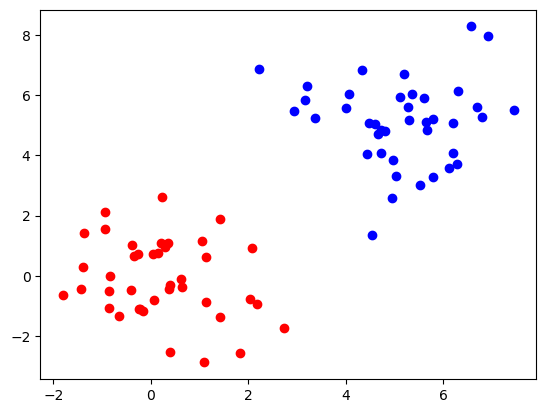

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

In [16]:
%matplotlib inline
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from IPython.html.widgets import interact

class HLA():
    def __init__(self):
        np.random.seed(1)
        self.X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
        self.y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b') 
        delta = 0.025
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        Xf = XX.flatten()
        Yf = YY.flatten()
        self.sz=XX.shape
        self.data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);

    def run(self,w0,w1,offset):
        w=np.array([w0,w1])
        w.shape=(2,1)
        Z = self.data.dot(w)+offset
        Z.shape=self.sz
        plt.scatter(self.X[0:40,0],self.X[0:40,1],color='r')
        plt.scatter(self.X[40:,0],self.X[40:,1],color='b')
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10),alpha=0.3, vmin=-30, vmax=30)
        XX = self.data[:,0].reshape(self.sz)
        YY = self.data[:,1].reshape(self.sz)
        plt.contour(XX,YY,Z,[0])
        fig = plt.gcf()
        fig.set_size_inches(9,9)
   

def decorator(w0,w1,offset):
    widget_hla.run(w0,w1,offset)
    
widget_hla = HLA()
interact(decorator, w0=(-10.,10.), w1=(-10.,10.), offset=(-20.,40.));

<div class = "alert alert-success">**PREGUNTA:** Usando el widget anterior, comprueba manualmente las siguientes configuraciones:

<li> $(w_0,w_1,\text{offset}) = (-1.7, -3.1, 10)$
<li> $(w_0,w_1,\text{offset}) = (-3.7, -0.5, 10.3)$
<li> $(w_0,w_1,\text{offset}) = (-7.5, -3.2, 28.8)$
<p>
¿Cuál de ellas crees que setea un mejor límite y por qué?
</div>

<div class="alert alert-info">
**INTUICIÓN:** El clasificador Support Vector Machine encuentra el límite con la máxima distancia/**margen** a ambas clases.</div>

Observaciones:
- Modela implícitamente la noción de ruido. Se espera que el límite con margen máximo sea robusto a pequeñas perturbaciones en los datos.
- Un clasificador con margen máximo tiene una solución única en el caso separable.

Comprobemos el resultado de ajustar un clasificador SVM utilizando sklearn:

Number of support vectors: 3
(w0,w1) = [-7.58277576 -3.19765261]
offset = 28.69764740799983


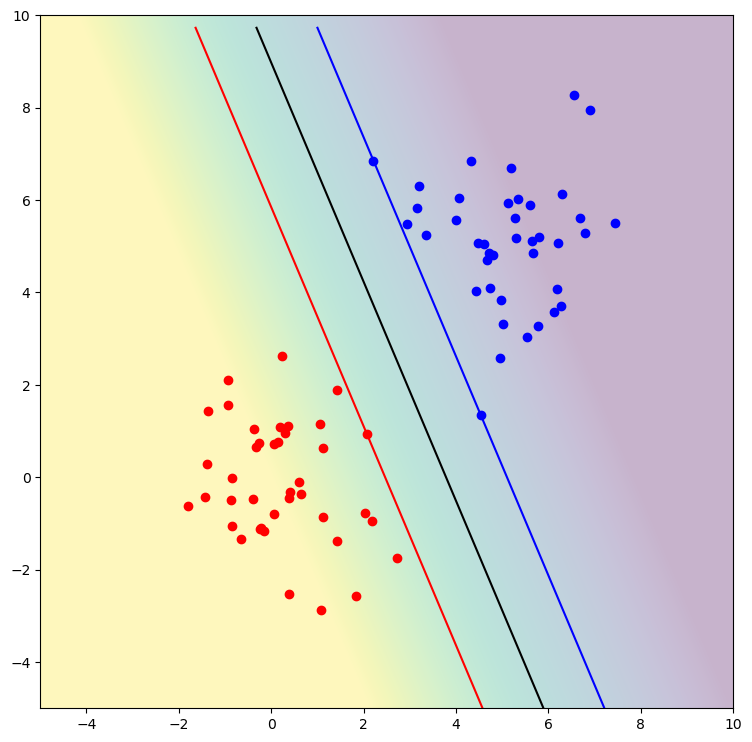

In [17]:
# Reset the global namespace in the notebook to start fresh
%reset -f

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm  # Import SVM model from scikit-learn

# Define a class for the SVM example
class svm_example():
    def __init__(self):
        '''Data creation: Generates synthetic data for classification'''
        np.random.seed(1)  # Set seed for reproducibility
        # Generate synthetic data: two clusters with normal distribution
        self.X = np.concatenate([1.25*np.random.randn(40,2), 5+1.5*np.random.randn(40,2)])
        # Generate labels: first 40 are 1, next 40 are -1
        self.y = np.concatenate([np.ones((40,1)), -np.ones((40,1))])

    def run(self):
        '''Fit a linear SVM: Train an SVM classifier with a linear kernel'''
        self.clf = svm.SVC(kernel='linear')  # Initialize the SVM with a linear kernel
        self.clf.fit(self.X, self.y.ravel())  # Fit the SVM model with the data
        
    def display(self):
        '''Display the decision boundary, margins, and support vectors'''
        # Create a mesh grid for plotting decision boundary
        delta = 0.25
        xx = np.arange(-5.0, 10.0, delta)
        yy = np.arange(-5.0, 10.0, delta)
        XX, YY = np.meshgrid(xx, yy)
        
        # Prepare the grid points for prediction
        Xf = XX.flatten()
        Yf = YY.flatten()
        sz = XX.shape
        data = np.concatenate([Xf[:, np.newaxis], Yf[:, np.newaxis]], axis=1)
        
        # Predict the decision function value for each grid point
        Z = self.clf.decision_function(data)
        Z.shape = sz
        
        # Plot the data points: red for one class, blue for the other
        plt.scatter(self.X[0:40, 0], self.X[0:40, 1], color='r')
        plt.scatter(self.X[40:, 0], self.X[40:, 1], color='b')
        
        # Display the decision boundary and margins
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,10,-5,10), alpha=0.3, vmin=-3, vmax=3)
        plt.contour(XX, YY, Z, [-1, 0, 1], colors=['b', 'k', 'r'])  # Draw the margins and decision boundary
        
        # Enhance the plot
        fig = plt.gcf()
        fig.set_size_inches(9, 9)
        
        # Print the number of support vectors for each class
        print('Number of support vectors: ' + str(np.sum(self.clf.n_support_)))
        
        # Highlight the support vectors on the plot
        plt.scatter(self.clf.support_vectors_[:, 0], 
                    self.clf.support_vectors_[:, 1], 
                    s=120, 
                    facecolors='none', 
                    linewidths=2,
                    zorder=10)
        
        # Print the coefficients of the decision function (w0, w1) and the offset
        print('(w0,w1) = ' + str(10*self.clf.coef_[0]))
        print('offset = ' + str(10*self.clf.intercept_[0]))
        
        # Return grid for further use if necessary
        return XX, YY, Z

# Create an instance of the svm_example class
c = svm_example()
c.run()  # Train the SVM model
XX, YY, Z = c.display()  # Display the results

Observa que hay un subconjunto crítico de puntos de datos. Se denominan **vectores de apoyo**. Si alguno de esos puntos desaparece, el límite cambia.  El límite de decisión depende de los vectores de soporte, por lo que tenemos que almacenarlos en nuestro modelo.

Comprueba la intuición en 3D:

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
np.random.seed(1)
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])
def control3D(elevation,azimuth):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    fig.set_size_inches(12,12)
    ax.plot_surface(XX,YY,Z,cmap=cm.coolwarm,alpha=0.3,linewidth=0)
    ax.scatter(X[0:40,0],X[0:40,1],1,color='r')
    ax.scatter(X[40:,0],X[40:,1],-1,color='b')
    ax.contour(XX,YY,Z,[-1,0,1],colors=['b','k','r'])
    ax.view_init(elev=elevation, azim=azimuth)

#Ipython 2.0
interact(control3D,elevation=(0.,90.),azimuth=(0,360))
#Ipython 1.1
#elevation = 45
#azimuth = 180
#control3D(elevation,azimuth)

NameError: name 'interact' is not defined

<div class = "alert alert-success">**QUESTIONS: **
<li> Set the azimuth to $113$ and elevation to $0$. Observe the data points and the relative position of the hyperplane. 
<li> Change the elevation to $90$. Describe this projection.
</div>

## 2.1 Modelando Máquinas de Vectores de Soporte.

### 2.1.1 Geometría del hiperplano
Un hiperplano en ${\bf R}^d$ se define como una combinación afín de las variables: $\pi\equiv a^Tx + b = 0$.

Características:

+ Un hiperplano divide el espacio en dos semiespacios. La evaluación de la ecuación del hiperplano en cualquier elemento de uno de los semiespacios es un valor positivo. Es un valor negativo para todos los elementos en el otro semiespacio.
+ La distancia de un punto $x \in{\bf R}^d$ al hiperplano $\pi$ es 
$$d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$$

### 3.1.2 Modelando el hiperplano separador
Dado un problema de clasificación binaria con datos de entrenamiento $\mathcal{D}=\{(x_i,y_i)\},\; i=1\dots N, \; y_i\in\{+1,-1\}$. Consideremos $\mathcal{S} \subseteq \mathcal{D}$ el subconjunto de todos los puntos de datos que pertenecen a la clase $+1$, $\mathcal{S}=\{x_i | y_i=+1\}$, y $\mathcal{R}=\{x_i | y_i=-1\}$ su complemento.

Entonces, el problema de encontrar un hiperplano separador consiste en cumplir con las siguientes restricciones

$$a^Ts_i+b>0\; \text{y}\; a^Tr_i+b<0 \quad \forall s_i\in\mathcal{S}, r_i\in\mathcal{R}.$$

Note las desigualdades estrictas en la formulación. Informalmente, podemos considerar la restricción mínima satisfecha. Y observar que el resto debe satisfacerse con un valor mayor. Así, podemos establecer arbitrariamente ese valor a 1 y reescribir el problema como $$a^Ts_i+b\geq 1\; \text{y}\; a^Tr_i+b\leq -1.$$

Este es un *problema de factibilidad* y usualmente se escribe de la siguiente manera en notación estándar de optimización

$$
\begin{align}
\text{minimizar} & 1\\
\text{sujeto a} & a^T r_i + b \leq -1,\; \forall r_i \in \mathcal{R}\\
& a^T s_i + b \geq 1\; \forall s_i \in \mathcal{S}
\end{align}
$$

o de manera compacta

$$
\begin{align}
\text{minimizar} & 1\\
\text{sujeto a} & y_i (a^T x_i + b) \geq 1,\; \forall x_i \in \mathcal{D}\\
\end{align}
$$

La solución de este problema no es única, por ejemplo, recuerde todos los parámetros del 'Algoritmo de Aprendizaje Humano'. 

### 2.1.3 El hiperplano de margen máximo

Seleccionar el hiperplano de margen máximo requiere agregar una nueva restricción a nuestro problema. Recuerde de la geometría del hiperplano que la distancia de cualquier punto a un hiperplano está dada por $d(x,\pi)=\frac{a^Tx+b}{\|a\|_2}$.

Recuerde que queremos que los datos positivos estén más allá del valor 1 y los datos negativos por debajo de -1. Entonces, ¿cuál es el valor de distancia que queremos maximizar?

El punto positivo más cercano al límite está en $1/\|a\|_2$ y el punto de dato negativo más cercano al límite también está en $1/\|a\|_2$. Por lo tanto, los puntos de datos de diferentes clases están al menos a $2/\|a\|_2$ de distancia.

Recuerde que nuestro objetivo es encontrar el hiperplano separador con el máximo margen, es decir, con la máxima distancia entre elementos de diferentes clases. Por lo tanto, podemos completar la formulación anterior con nuestro último requisito de la siguiente manera

$$
\begin{align}
\text{maximizar} & 2/\|a\|_2 \\
\text{sujeto a} & y_i (a^T x_i + b) \geq 1,\; \forall x_i en \mathcal{D}\\
\end{align}
$$

o equivalentemente,

$$
\begin{align}
\text{minimizar} & \|a\|_2/2 \\
\text{sujeto a} & y_i (a^T x_i + b) \geq 1,\; \forall x_i en \mathcal{D}\\
\end{align}
$$

Esta formulación tiene una solución siempre que el problema sea linealmente separable.

### 2.1.4 Tratando con el caso no separable

Para tratar con las clasificaciones erróneas, vamos a introducir un nuevo conjunto de variables $\xi_i$, que representa la cantidad de violación en la restricción $i$-ésima. Si la restricción ya está satisfecha, entonces $\xi_i=0$, y $\xi_i>0$ de lo contrario. Dado que $\xi_i$ está relacionado con los errores, nos gustaría mantener esta cantidad lo más cercana a cero posible. Esto nos lleva a introducir un elemento en el objetivo que compensa con el margen máximo.

El nuevo modelo se convierte en

$$
\begin{align}
\text{minimizar} & \|a\|_2/2 + C \sum\limits_{i=1}^N \xi_i\\
\text{sujeto a} & y_i (a^T x_i + b) \geq 1 - \xi_i,\; i=1\dots N\\
& \xi_i\geq 0
\end{align}
$$

donde $C$ es el parámetro de compensación que equilibra aproximadamente el margen y la tasa de clasificación errónea. Esta formulación también se llama **SVM de margen suave**.

<div class="alert alert-info">**Idea:**
<ul>
<li> La SVM clásica se ajusta a un hiperplano que separa los límites. </li>
<li> El hiperplano se define para lograr el máximo margen. </li>
<li> Si el problema no es linealmente separable, se introduce un nuevo término relacionado con el rendimiento de la clasificación errónea que compensa con el margen. Esta compensación se rige por el parámetro $C$ (o $\nu$ en $\nu$-SVM). </li>
</ul>
</div>

### 2.1.5 El problema del New York Times otra vez

Vamos a aplicar nuestro conocimiento al predictor de temas de titulares del New York Times.

Loading ok.
classification accuracy: 0.5318120805369128
Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.43      0.52       173
           2       0.33      0.51      0.40       183
           3       0.65      0.65      0.65       440
           4       0.20      0.38      0.26        16
           5       0.48      0.47      0.47       187
           6       0.69      0.64      0.66       212
           7       0.38      0.33      0.35        63
           8       0.58      0.57      0.58        74
          10       0.44      0.42      0.43       132
          12       0.47      0.41      0.44       493
          13       0.49      0.44      0.46        48
          14       0.26      0.42      0.32        90
          15       0.26      0.31      0.29       277
          16       0.56      0.58      0.57      1290
          17       0.38      0.45      0.41       120
          18       0.32      0.24      0.28        33
  

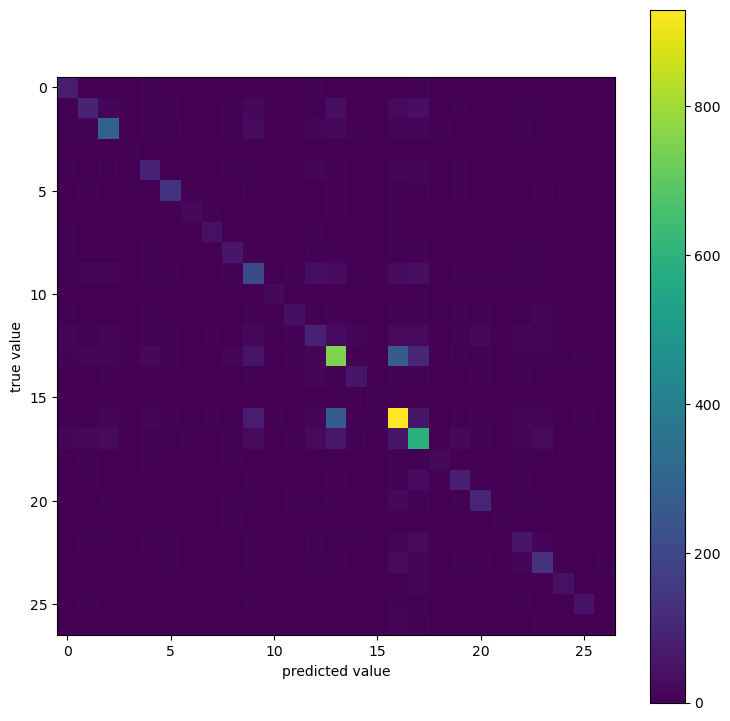

In [19]:
#Recover NTY data
import pickle
fname = open('NYT_data.pkl','rb')
data = pickle.load(fname)
X_train = data[0]
y_train = data[1]
X_test = data[2]
y_test = data[3]
print ('Loading ok.')

from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train,y_train)

y_hat = clf.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

Loading ok.
classification accuracy: 0.6136912751677852
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.49      0.56       154
           2       0.47      0.60      0.53       219
           3       0.70      0.67      0.69       459
           4       0.33      0.53      0.41        19
           5       0.62      0.58      0.60       195
           6       0.78      0.71      0.74       216
           7       0.66      0.47      0.55        79
           8       0.65      0.60      0.63        78
          10       0.59      0.57      0.58       129
          12       0.52      0.45      0.48       507
          13       0.47      0.61      0.53        33
          14       0.32      0.50      0.39        92
          15       0.36      0.42      0.38       280
          16       0.68      0.65      0.67      1388
          17       0.49      0.50      0.50       137
          18       0.44      0.42      0.43        26
  

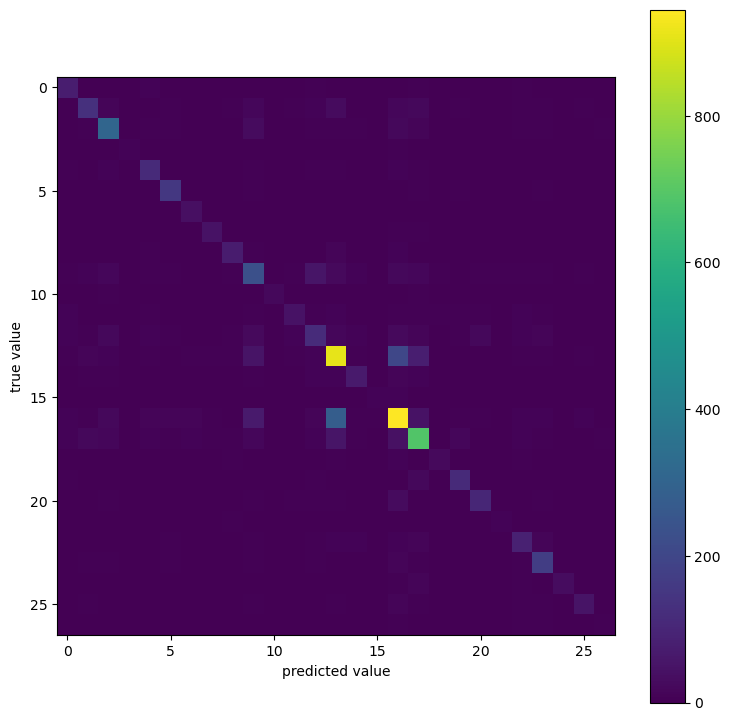

In [20]:
#Recover NTY data
import pickle
fname = open('NYT_context_data.pkl','rb')
data = pickle.load(fname)
X_train = data[0]
y_train = data[1]
X_test = data[2]
y_test = data[3]
print ('Loading ok.')

from sklearn import svm
clf = svm.LinearSVC()
clf.fit(X_train,y_train)

y_hat = clf.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))

Utilizando los parámetros por defecto podemos mejorar la tasa de reconocimiento en $10\%$. Sin embargo, no podemos comprobar las palabras más importantes. ¿Podemos encontrar una solución mejor?

In [22]:
# Importing necessary libraries for model selection
from sklearn import model_selection
from sklearn import svm

# Defining the parameter grid: 
# 'C' is a regularization parameter for LinearSVC. It controls the trade off between achieving a low training error and a 
# low testing error (generalization).
# A smaller 'C' value leads to a smoother decision boundary (less fitting to the training data), 
# while a larger 'C' encourages the model to classify all training examples correctly by giving the model more flexibility.
# Here, we're defining a range of 'C' values to try out with GridSearchCV to find the best one.
parameters = {'C': [0.01, 0.05, 0.1, 0.5, 1, 10]}

# Initializing the LinearSVC model
svc = svm.LinearSVC()

# Setting up GridSearchCV:
# 'svc' is the SVM model with a linear kernel to be trained.
# 'parameters' contains the grid of parameters ('C' values here) we want to try out.
# GridSearchCV will systematically work through the combinations of parameters (different 'C' values),
# train the model for each combination, and evaluate its performance.
clf = model_selection.GridSearchCV(svc, parameters)

# Fitting GridSearchCV:
# This will train the LinearSVC model multiple times with the different 'C' values specified in 'parameters'.
# For each 'C' value, it uses cross-validation to evaluate the model's performance.
# Cross-validation is a technique for assessing how the results of a statistical analysis will generalize to
# an independent data set.
# It does this by partitioning the original training data set into a training set to train the model,
# and a validation set to evaluate it. This process is repeated for each 'C' value.
clf.fit(X_train, y_train)

# After .fit() completes, clf (our GridSearchCV object) will contain a lot of information:
# - The best 'C' value found.
# - The model fitted with the best 'C' value.
# - The scores or performance metrics for each 'C' value tried.

C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\alfons.marques\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10]})

The best parameterization is {'C': 0.05}
The achieved score is 0.6804177426208022
Checking the rest of the scores 

[0.65205094 0.68041774 0.6794424  0.65328071 0.63903364 0.60239843]


C:\Users\alfons.marques\AppData\Local\Temp\ipykernel_29772\2209456499.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0.01, 0.05, 0.1, 0.5, 1, 10])


[Text(-1.0, 0, '0.01'),
 Text(0.0, 0, '0.05'),
 Text(1.0, 0, '0.1'),
 Text(2.0, 0, '0.5'),
 Text(3.0, 0, '1'),
 Text(4.0, 0, '10'),
 Text(5.0, 0, ''),
 Text(6.0, 0, '')]

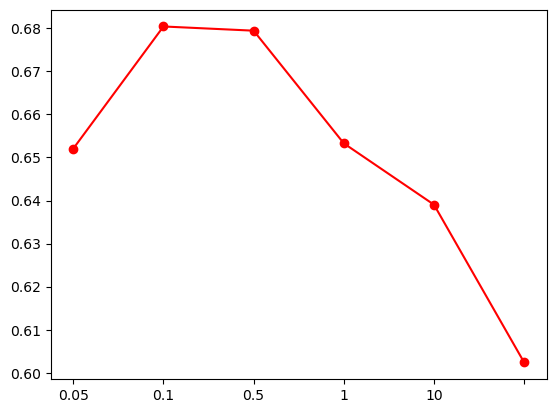

In [23]:
print ('The best parameterization is ' + str(clf.best_params_))
print ('The achieved score is ' + str(clf.best_score_))

print ('Checking the rest of the scores \n')
import matplotlib.pyplot as plt
print(clf.cv_results_['mean_test_score'])

plt.plot(clf.cv_results_['mean_test_score'],'r',marker='o')
ax = plt.gca()
ax.set_xticklabels([0.01, 0.05, 0.1, 0.5, 1, 10])    

## Entendiendo la Mejor Parametrización y el Puntaje Alcanzado en GridSearchCV

Al realizar una búsqueda en cuadrícula en aprendizaje automático usando `GridSearchCV`, el objetivo es encontrar los mejores parámetros para un modelo que resulten en el puntaje de rendimiento más alto. Aquí explicamos qué significan estos términos:

### Mejor Parametrización

- **Mejor Parametrización**: Esto se refiere al conjunto de parámetros que dieron los mejores resultados después de que se completó la búsqueda en cuadrícula. En el contexto de una SVM con un parámetro `C`, indica el valor de `C` que condujo al mejor rendimiento del modelo. Por ejemplo, si `GridSearchCV` devuelve `{'C': 1}`, significa que usar `C=1` para la SVM resultó en las predicciones más precisas durante el proceso de validación cruzada.

### Puntaje Alcanzado

- **Puntaje Alcanzado**: Después de encontrar la mejor parametrización, `GridSearchCV` también proporciona el mejor puntaje que se logró con este parámetro. Este puntaje es un número que refleja qué tan bien está funcionando el modelo con los mejores parámetros. El significado específico del puntaje depende del método de puntuación utilizado (por ejemplo, precisión, exactitud, recall, puntaje F1). Por ejemplo, si el puntaje es `0.60212765`, y estamos usando la precisión como nuestra métrica de puntuación, indica que el modelo con el mejor parámetro (`C=1`) pudo predecir correctamente las etiquetas de clase para aproximadamente el 60.21% del conjunto de datos validado cruzadamente.

### Poniéndolo Todo Junto

El proceso de usar `GridSearchCV` no solo ayuda a ajustar el modelo para encontrar los mejores ajustes, sino que también nos da una estimación de qué tan bien es probable que el modelo se desempeñe en datos no vistos. Es importante mirar tanto los mejores parámetros como el puntaje alcanzado para entender la efectividad potencial de tu modelo.

classification accuracy: 0.6595973154362416
Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.56      0.62       144
           2       0.46      0.68      0.55       189
           3       0.77      0.72      0.74       473
           4       0.37      0.79      0.50        14
           5       0.65      0.70      0.67       171
           6       0.84      0.76      0.80       220
           7       0.73      0.55      0.63        74
           8       0.75      0.69      0.72        78
          10       0.57      0.57      0.57       125
          12       0.57      0.48      0.52       518
          13       0.51      0.71      0.59        31
          14       0.37      0.68      0.48        79
          15       0.40      0.53      0.46       253
          16       0.74      0.68      0.71      1454
          17       0.57      0.61      0.59       131
          18       0.32      0.50      0.39        16
          19  

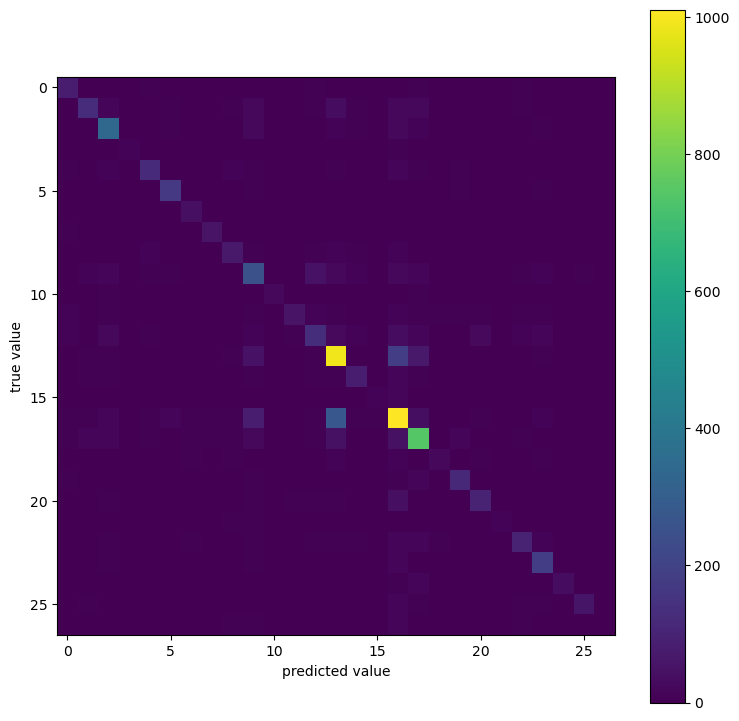

In [24]:
y_hat = clf.predict(X_test)
from sklearn import metrics
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print ("classification accuracy:", metrics.accuracy_score(y_hat, y_test))
plot_confusion_matrix(y_hat, y_test)
print ("Classification Report:")
print (metrics.classification_report(y_hat,np.array(y_test)))